In [1]:
import seaborn as sns
import matplotlib

In [2]:
# 動作環境の確認
# print(pd.__version__)
# print(np.__version__)
print(sns.__version__)
print(matplotlib.__version__)
!python3 --version

0.11.2
3.5.2
Python 3.8.5


In [3]:
penguins = sns.load_dataset('penguins')

## axis-level 関数における、move_legend()の使い方

move_legendの第1引数にax（matplotlib.axes.Axes オブジェクト）を指定すれば良い。

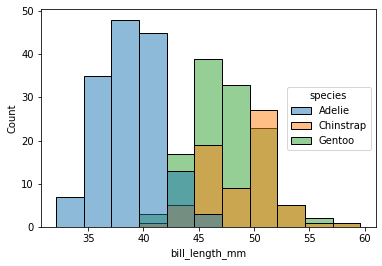

In [4]:
ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "center right")

……公式サイトに載ってるのと図のスタイルが違うのが気になるが、まぁ良いや。  
位置として"center right"を指定して、そのとおりに上下は中央・左右は右端に凡例が移動した。

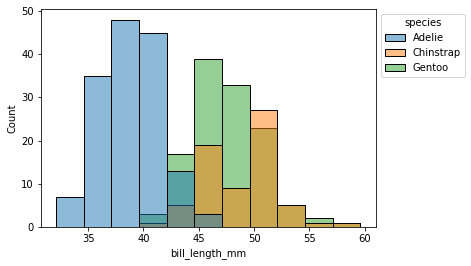

In [5]:
ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

bbox_to_anchor=(1, 1)は「凡例を図の右上に配置せよ」である。
位置指定文字列のlocが"upper left"なので、凡例の左上の隅を図の右上に合わせるということで、上図の結果になる。

つまり、

* bbox_to_anchorを指定しない場合（1つ目の例）は、位置指定文字列は「凡例を図中のどの位置に配置するか」を示す
* bbox_to_anchorを指定しない場合（1つ目の例）は、位置指定文字列は「凡例のどの位置を、図のbbox_to_anchorに合わせるか」を示す

ってことか。（これはseabornではなくmarplotlib側の仕様である：[公式ドキュメント](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) ）   
ガラッと意味が変わってくるからちょっと違和感があるなぁ。

最後の例。

## figure-level関数におけるmove_legend()の使い方